<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


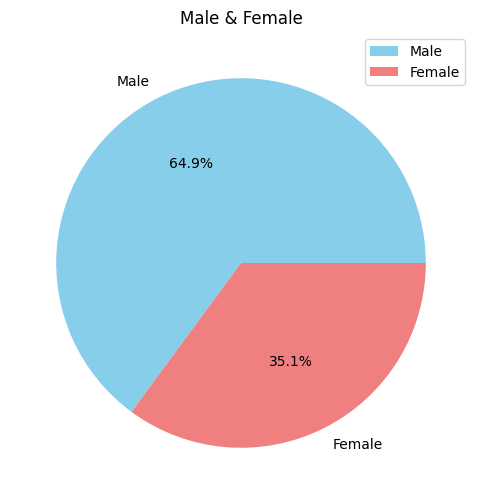

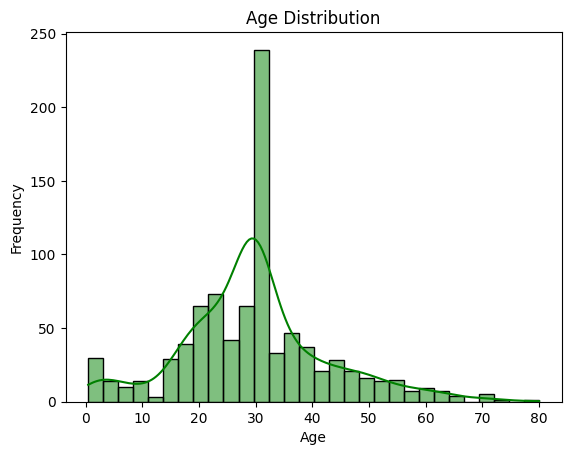

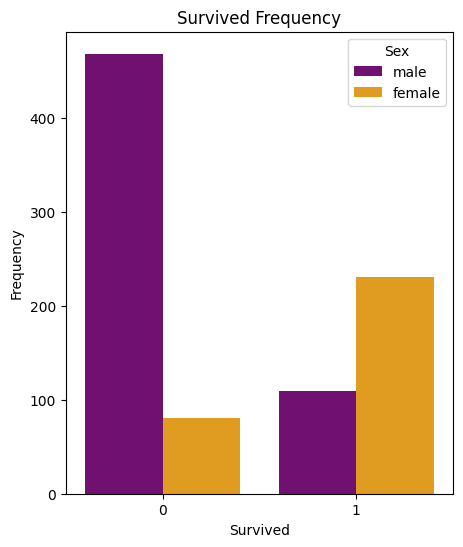

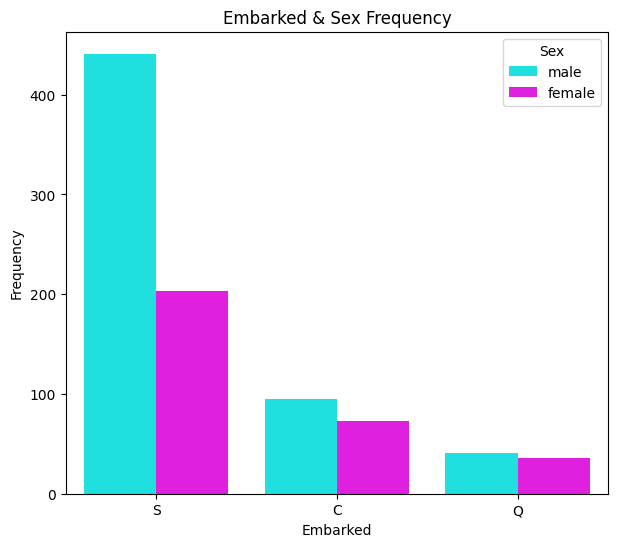

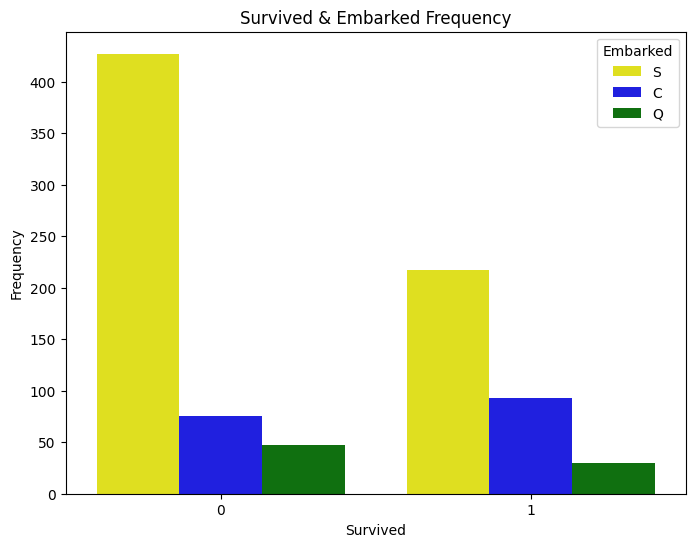

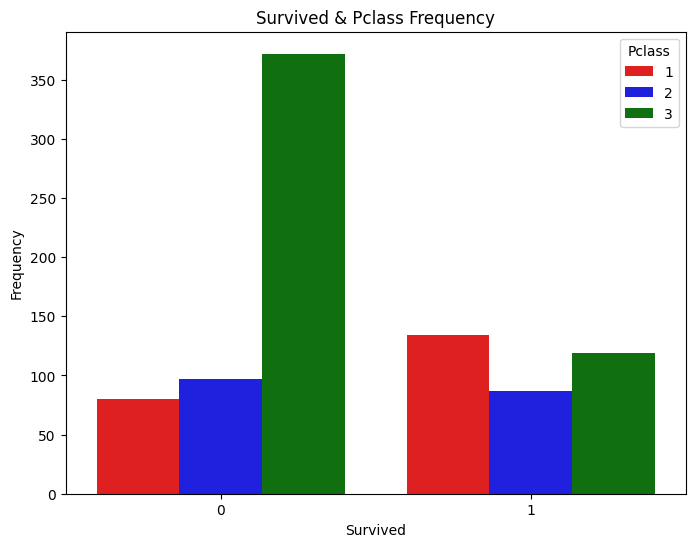

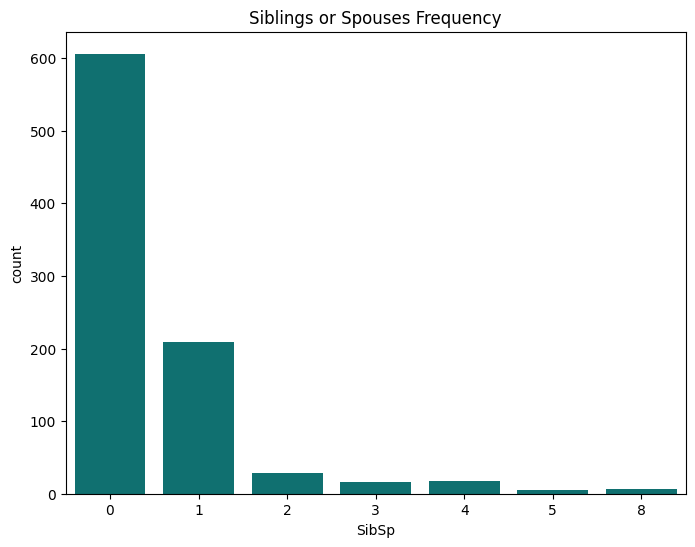

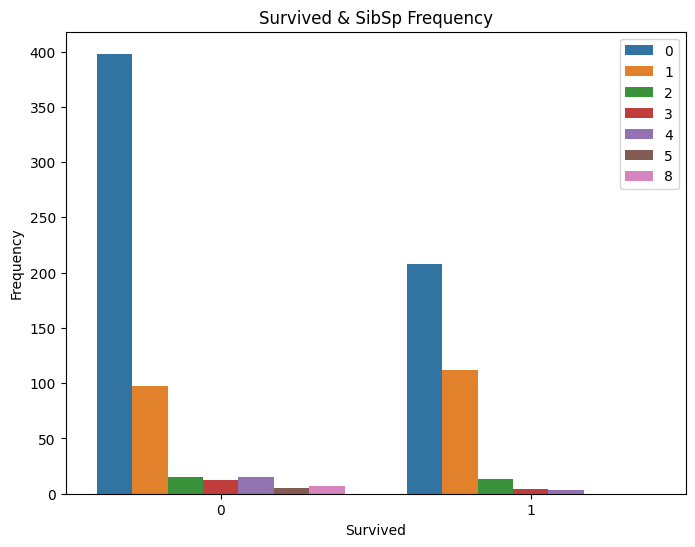

0.8146067415730337

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as dig
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

var = pd.read_csv('/content/Titanic-Dataset.csv')

var.head()

var.shape

var.duplicated().sum()

var.isnull().sum()

var.groupby('Sex')['Age'].mean().reset_index()

var['Age'].fillna(var['Age'].mean(), inplace=True)

var.drop('Cabin', axis=1,inplace=True)

var.dropna(inplace=True)

var.info()

var.head()

gender = var['Sex'].value_counts()
gender

dig.figure(figsize=(10,6))
dig.pie(gender, labels=['Male', 'Female'] ,autopct='%.1f%%', colors=['skyblue','lightcoral'])
dig.legend()
dig.title('Male & Female')
dig.show()

sns.histplot(data=var, x='Age', bins=30, kde=True, color='green')
dig.title('Age Distribution')
dig.xlabel('Age')
dig.ylabel('Frequency')
dig.show()

sv_sex = var[['Survived','Sex']].value_counts().reset_index()
sv_sex

dig.figure(figsize=(5,6))
sns.barplot(data=sv_sex , x=sv_sex['Survived'], y=sv_sex['count'], hue=sv_sex['Sex'], palette=['purple', 'orange'])
dig.title('Survived Frequency')
dig.xlabel('Survived')
dig.ylabel('Frequency')
dig.show()

Em_sex = var[['Embarked', 'Sex']].value_counts().reset_index()
Em_sex

dig.figure(figsize=(7,6))
sns.barplot(data=Em_sex , x=Em_sex['Embarked'], y=Em_sex['count'], hue=Em_sex['Sex'], palette=['cyan', 'magenta'])
dig.title('Embarked & Sex Frequency')
dig.xlabel('Embarked')
dig.ylabel('Frequency')
dig.show()

sv_em = var[['Survived', 'Embarked']].value_counts().reset_index()
sv_em

dig.figure(figsize=(8,6))
sns.barplot(data=sv_em , x=sv_em['Survived'], y=sv_em['count'], hue=sv_em['Embarked'], palette=['yellow', 'blue', 'green'])
dig.title('Survived & Embarked Frequency')
dig.xlabel('Survived')
dig.ylabel('Frequency')
dig.show()

sv_class = var[['Survived', 'Pclass']].value_counts().reset_index()
sv_class

dig.figure(figsize=(8,6))
sns.barplot(data=sv_class , x=sv_class['Survived'], y=sv_class['count'], hue=sv_class['Pclass'], palette=['red', 'blue', 'green'])
dig.title('Survived & Pclass Frequency')
dig.xlabel('Survived')
dig.ylabel('Frequency')
dig.show()

sib = var['SibSp'].value_counts().reset_index()
sib

dig.figure(figsize=(8,6))
sns.barplot(x=sib['SibSp'], y=sib['count'], color='teal')
dig.title('Siblings or Spouses Frequency')
dig.show()

sv_sib = var[['Survived', 'SibSp']].value_counts().reset_index()
sv_sib

dig.figure(figsize=(8,6))
sns.barplot(data=sv_sib , x=sv_sib['Survived'], y=sv_sib['count'], hue=sv_sib['SibSp'], palette='tab10')
dig.title('Survived & SibSp Frequency')
dig.legend(loc='upper right')
dig.xlabel('Survived')
dig.ylabel('Frequency')
dig.show()

test = var.drop(['PassengerId','Name','Ticket'], axis=1)
test

label_encoder = LabelEncoder()

test['Sex'] = label_encoder.fit_transform(test['Sex'])
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])

test

x = test.drop('Survived', axis=1)
y = test['Survived']

X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

model_logistic = LogisticRegression()

model_logistic.fit(X_train, Y_train)

model_logistic.score(X_train, Y_train)

model_logistic.score(x_test, y_test)

model_random = RandomForestClassifier()

model_random.fit(X_train, Y_train)

model_random.score(X_train, Y_train)

model_random.score(x_test, y_test)
